### Кластеризация

#### KMeans

<img src="kmeans.png">

$${\displaystyle J_k=\sum _{i=1}^{k}\sum _{x\in S_{i}}(x-\mu _{i})^{2}} \rightarrow min$$
$k$ - число кластеров <br>
$S_i$ - полученные кластеры <br>
$\mu_i$ - центр масс класетра $S_i$


Количество кластеров выбирается заранее. 

### Алгоритм

1. Выбрать количество кластеров , которое нам кажется оптимальным для наших данных.
2. Высыпать случайным образом в пространство наших данных  точек (центроидов).
3. Для каждой точки нашего набора данных посчитать, к какому центроиду она ближе.
4. Переместить каждый центроид в центр выборки, которую мы отнесли к этому центроиду.
5. Повторять последние два шага фиксированное число раз, либо до тех пор пока центроиды не "сойдутся" (обычно это значит, что их смещение относительно предыдущего положения не превышает какого-то заранее заданного небольшого значения).

In [1]:
# import libraries here pandas, sklearn.cluster.kmeans
%matplotlib inline
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [2]:
data1 = pd.read_csv('demo1.csv', index_col=0)

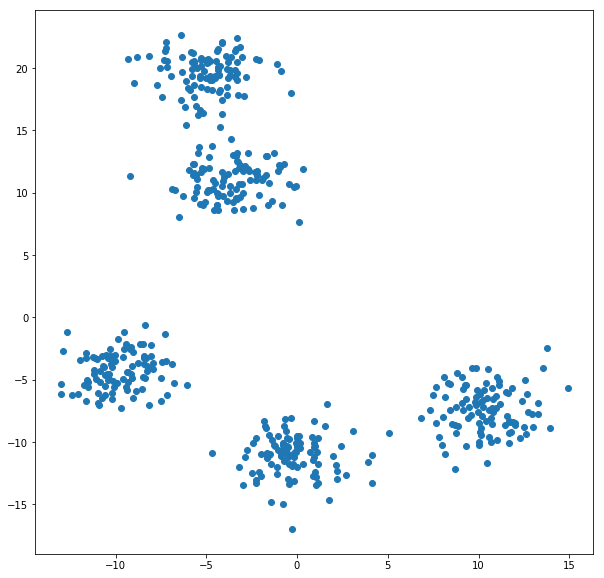

In [3]:
data1.columns = ['x','y']
plt.figure(figsize=(10,10))
plt.scatter(x=data1['x'], y=data1['y'])

In [4]:
# clustering 

cl = KMeans(n_clusters=2, random_state=1234)

cl.fit(data1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1234, tol=0.0001, verbose=0)

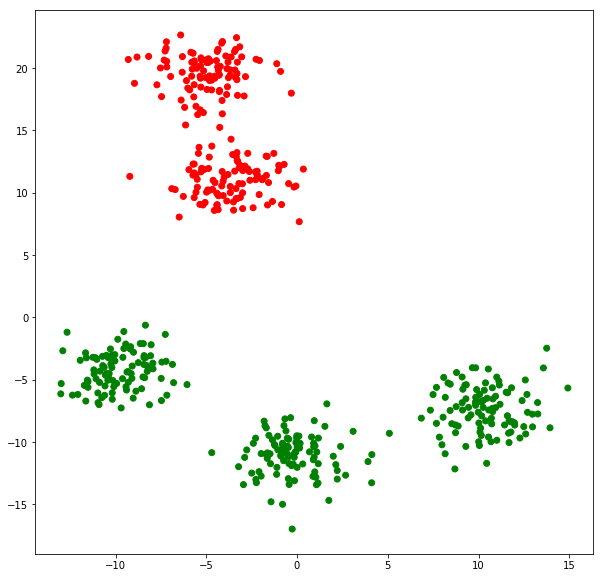

In [5]:
clusters = cl.fit_predict(data1)
cols = {1:'red', 0:'green'}
color = [cols[x] for x in clusters]
data1.columns = ['x','y']
plt.figure(figsize=(10,10))
plt.scatter(x=data1['x'], y=data1['y'], c=color)

$${\displaystyle J_k=\sum _{i=1}^{k}\sum _{x\in S_{i}}(x-\mu _{i})^{2}} \rightarrow min$$

$$D(k) = \frac{|J_k - J_{k+1}|}{|J_{k-1} - J_k|} \rightarrow \min\limits_k$$

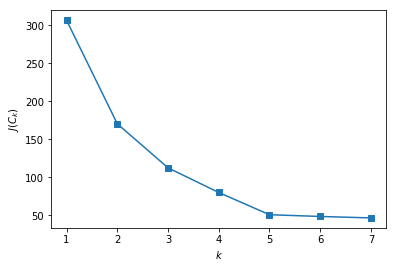

In [6]:
# choose optimal cluster number

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data1)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [7]:
cols = {1:'red', 0:'green', 2:'yellow', 3:'black', 4:'blue'}

In [8]:
# теперь на более серьезном наборе данных

In [9]:
data2 = pd.read_csv('Absenteeism_at_work.csv', sep=';')

In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

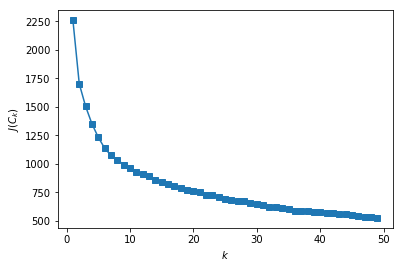

In [12]:
# choose optimal cluster number

limit = 50
inertia = []
for k in range(1, limit):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data2)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, limit), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

#### Иерархическая кластеризация

Можно по дереву склеивания кластеров посмотреть, когда остановить алгоритм.

<img src="hclust.png">

**Maximum or complete linkage clustering:** It computes all pairwise dissimilarities between the elements in cluster 1 and the elements in cluster 2, and considers the largest value (i.e., maximum value) of these dissimilarities as the distance between the two clusters. It tends to produce more compact clusters.

Maximum (complete) - попарные расстояния между элементами кластеров 1 и 2. Наибольшее расстояние - расстояние между кластерами.

**Minimum or single linkage clustering:** It computes all pairwise dissimilarities between the elements in cluster 1 and the elements in cluster 2, and considers the smallest of these dissimilarities as a linkage criterion. It tends to produce long, “loose” clusters.

Minimum - попарные расстояния между элементами кластеров 1 и 2. Наименьшее расстояние - расстояние между кластерами.

**Mean or average linkage clustering:** It computes all pairwise dissimilarities between the elements in cluster 1 and the elements in cluster 2, and considers the average of these dissimilarities as the distance between the two clusters.

Mean (average) - попарные расстояния между элементами кластеров 1 и 2. Среднее расстояние - расстояние между кластерами.

**Centroid linkage clustering:** It computes the dissimilarity between the centroid for cluster 1 (a mean vector of length p variables) and the centroid for cluster 2.

Centroid - расстояния между центроидами кластеров.

**Ward’s minimum variance method:** It minimizes the total within-cluster variance. At each step the pair of clusters with minimum between-cluster distance are merged.

Ward - минимизирует разброс внутри кластеров.

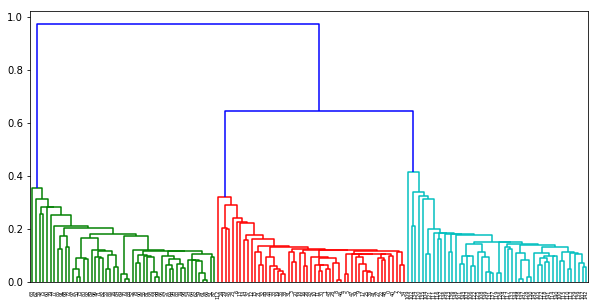

In [13]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

distance_mat = pdist(X) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'single') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

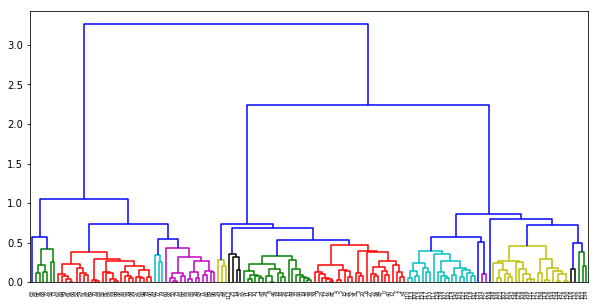

In [14]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

distance_mat = pdist(X) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'average') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

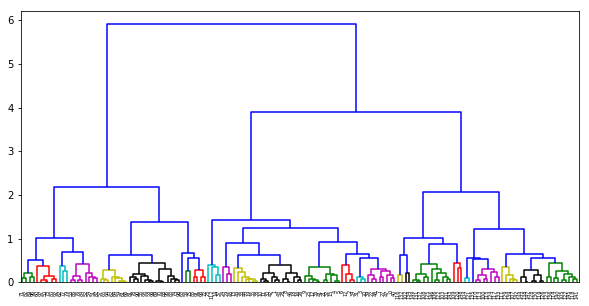

In [15]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

distance_mat = pdist(X) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'complete') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

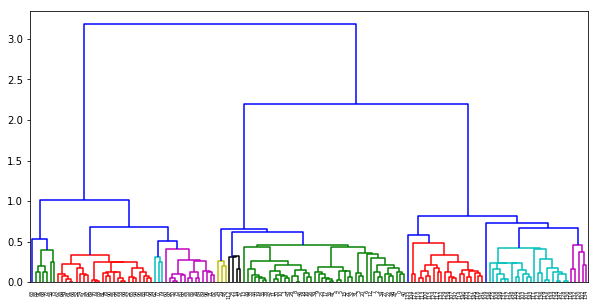

In [16]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

distance_mat = pdist(X) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'centroid') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

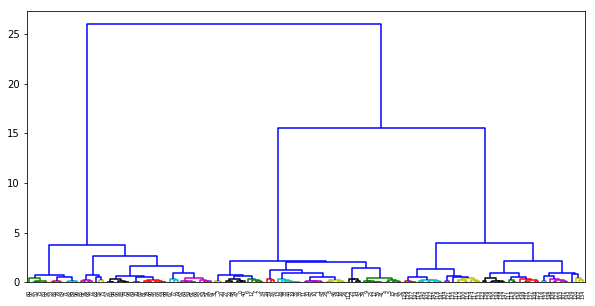

In [17]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

distance_mat = pdist(X) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'ward') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

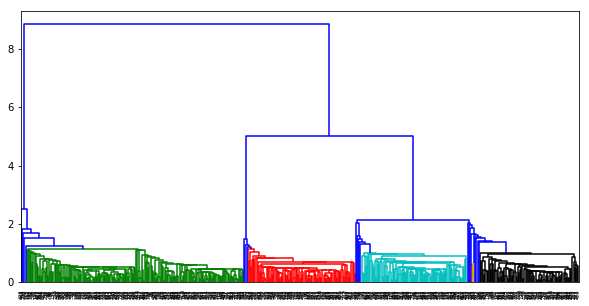

In [18]:
distance_mat = pdist(data1)
Z = hierarchy.linkage(distance_mat, 'single') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=1.15)